In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/Mall_Customers (1).csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.set_index('CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Genre']=label_encoder.fit_transform(df['Genre'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,:4]
y= df.index

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=123)
y_train.shape

(150,)

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cluster = []
for k in range (1,11):
  kmean=KMeans(n_clusters=k).fit(df)
  cluster.append(kmean.inertia_)

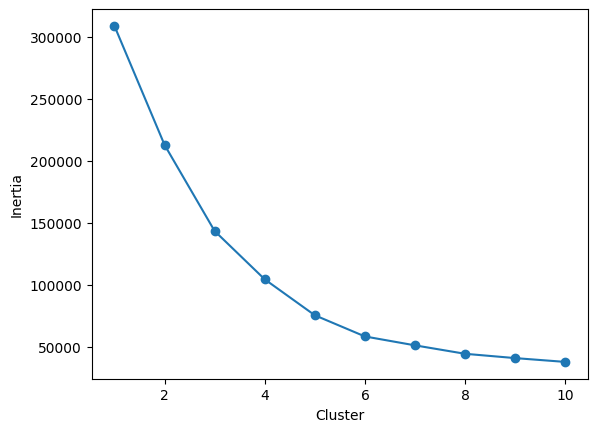

In [ ]:
plt.plot(range(1,11), cluster , marker="o")
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=5).fit(df)
df['Labels']=km.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
CustomerID,,,,,
1,1,19,15,39,1
2,1,21,15,81,3
3,0,20,16,6,1
4,0,23,16,77,3
5,0,31,17,40,1


In [ ]:
centers=np.array(km.cluster_centers_)

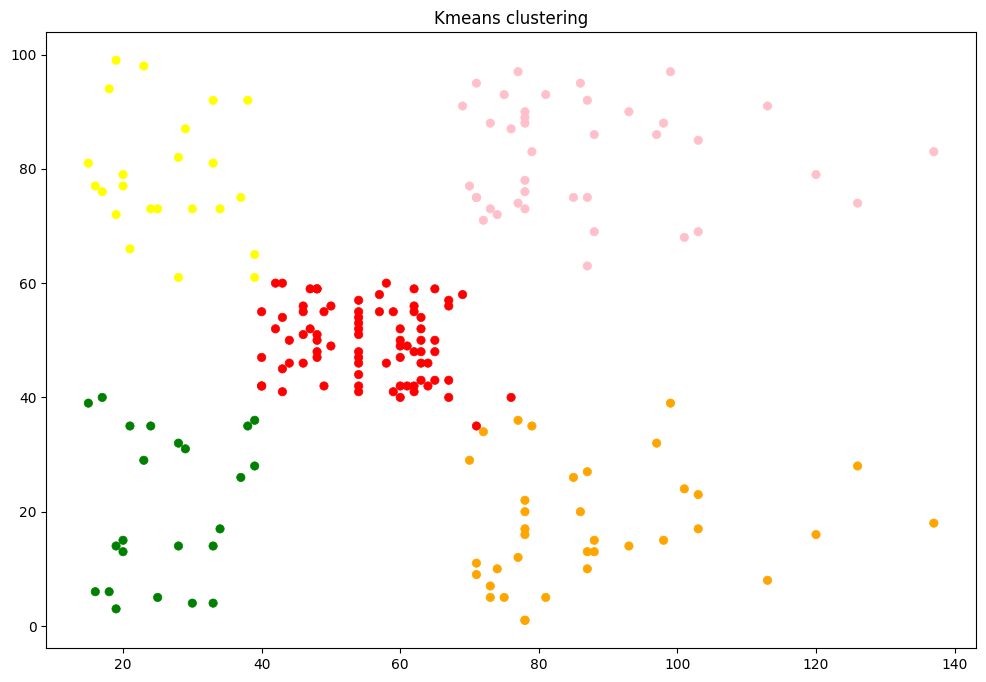

In [ ]:
colors={0:'red',1:'green',2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12,8))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],linewidth=0.5,color=df['Labels'].map(colors))
plt.title('Kmeans clustering')
plt.show()

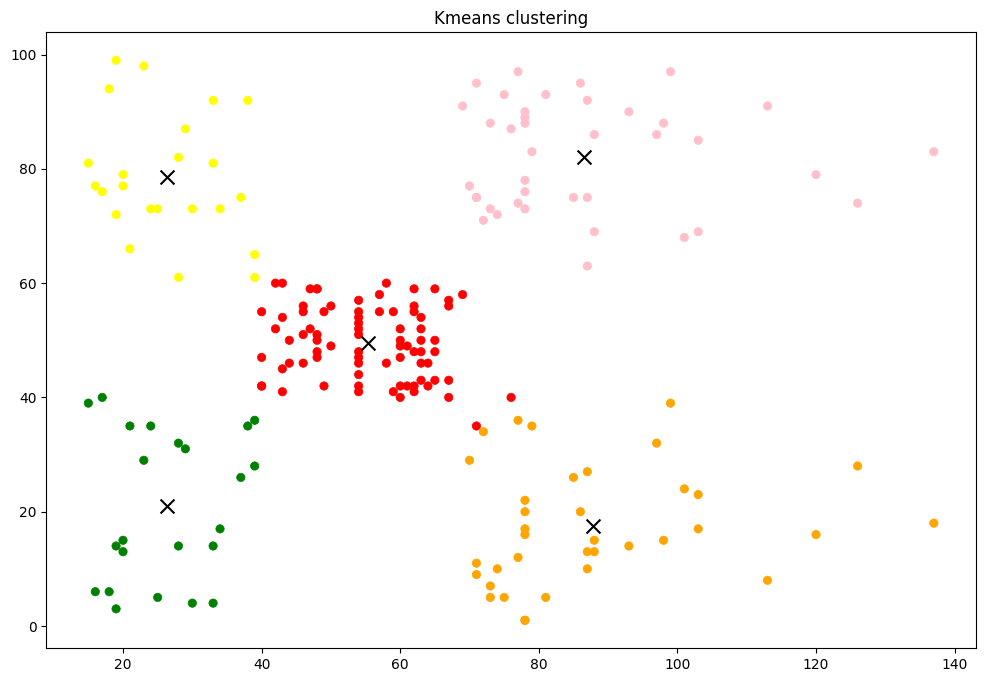

In [ ]:
colors={0:'red',1:'green',2:'orange',3:'yellow',4:'pink'}
plt.figure(figsize=(12,8))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],linewidth=0.5,color=df['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],s=100,c='black',label='Centriods',marker='x')
plt.title('Kmeans clustering')
plt.show()